In [96]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2

original_train_dir = os.path.abspath("./original_data/train/train")
train_pictures = os.listdir(original_train_dir)

df = pd.DataFrame(train_pictures, columns = ['filename'])
df['label'] = df.filename.str[:3]
df

,filename,label
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat
...,...,...
24995,dog.8008.jpg,dog
24996,dog.1992.jpg,dog
24997,dog.12412.jpg,dog
24998,cat.2701.jpg,cat


In [97]:
rand_indexes = np.random.randint(0,24999, size = 10)
rand_pics = df.loc[rand_indexes]
rand_pics.iloc[2,0]

'dog.10056.jpg'

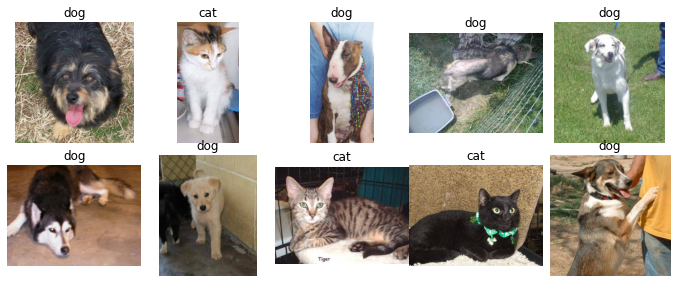

In [108]:
def display_images(data, nrows=2, ncols=5, figsize=(12, 4)):

    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
    

    for i, ax in enumerate(axes.flatten()):
        filename = data.iloc[i,0]
        label = data.iloc[i,1]
        image = plt.imread(f"{original_train_dir}/{filename}")
        ax.imshow(image)
        ax.axis("off")
        ax.set_title(label)

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(rand_pics)

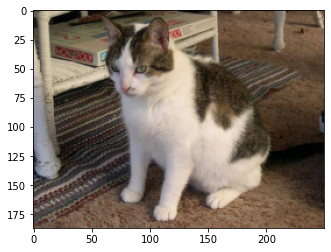

In [99]:
image = plt.imread(f"{original_train_dir}/cat.5682.jpg")
resize_factor = .5
new_size = int(image.shape[1]*resize_factor), int(image.shape[0]*resize_factor)

image = cv2.resize(image, new_size)
plt.imshow(image)

In [109]:
from dataset_split import select_sample_by_type

train_dogs = select_sample_by_type(df, 'dog', 800)
train_cats = select_sample_by_type(df, 'cat', 800)
# Drop selected data to disallow double picking i

In [103]:
train_dogs

,filename,label
3518,dog.9057.jpg,dog
23839,dog.9061.jpg,dog
17759,dog.9943.jpg,dog
9872,dog.11577.jpg,dog
20154,dog.3825.jpg,dog
...,...,...
21510,dog.4387.jpg,dog
2801,dog.6200.jpg,dog
16485,dog.11966.jpg,dog
12051,dog.8466.jpg,dog


In [106]:
df.shape

(23400, 2)